# Clustering of Real Estate in United States

To preprocess your dataset for clustering, follow these steps to ensure your data is ready and suitable for analysis:

Step 1: Handle Categorical Data
Encoding Categorical Variables: Variables such as "Month" and "Region" are categorical and should be converted into a numerical format that can be used in clustering algorithms. "Home Size" is also a categorical attribute that needs encoding.

Step 2: Check for Redundancy
Remove Redundant Features: Your dataset contains features such as "Median Income - Current Dollars" and "Median Income - 2022 Dollars" which might be redundant if they carry the same values across the dataset. This redundancy can skew the results of clustering.

Step 3: Normalize or Standardize Data

Scaling Numeric Features: Clustering algorithms like k-means are sensitive to the scales of the data. Features like "Average Sales Price" and "Number of Households (Thousands)" should be scaled to ensure that one feature does not dominate others due to its larger range.

Step 4: Missing Values
Check for Missing Values: Ensure there are no missing values in your dataset. If there are, you need to decide whether to fill them with an appropriate value (mean, median, mode) or to exclude the rows or columns with missing data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')


In [2]:
# Load data (assuming CSV file)
df = pd.read_csv('/kaggle/input/us-real-estate-incomepriceregion-census-data/RealEstateUnitedStates.CSV')

df.head()


,Year,Month,Region,Home Size,Average Sales Price,Number of Households (Thousands),Median Income - Current Dollars,Median Income - 2022 Dollars,Mean Income - Current Dollars,Mean Income - 2022 Dollars
0,2022,December,Midwest,Double,144300.0,28280.0,73070.0,73070.0,102400.0,102400.0
1,2022,December,Midwest,Single,82300.0,28280.0,73070.0,73070.0,102400.0,102400.0
2,2022,December,Midwest,Total1,104700.0,28280.0,73070.0,73070.0,102400.0,102400.0
3,2022,December,Northeast,Double,158300.0,22630.0,80360.0,80360.0,115300.0,115300.0
4,2022,December,Northeast,Single,75300.0,22630.0,80360.0,80360.0,115300.0,115300.0


In [3]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

X = df.loc[:, ["Average Sales Price","Median Income - Current Dollars"]]
X.head()

,Average Sales Price,Median Income - Current Dollars
0,144300.0,73070.0
1,82300.0,73070.0
2,104700.0,73070.0
3,158300.0,80360.0
4,75300.0,80360.0


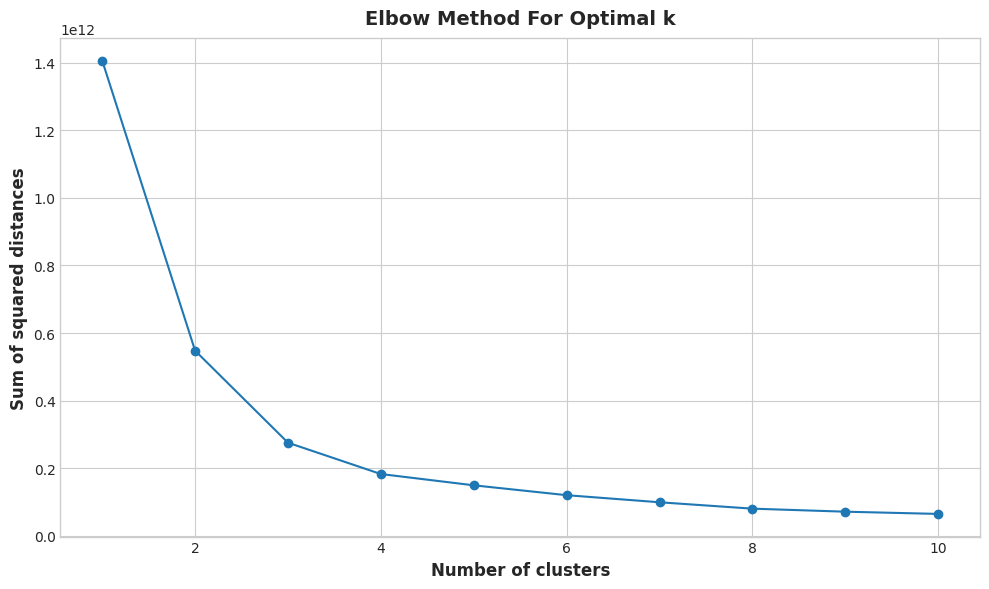

In [4]:
import pandas as pd
from sklearn.cluster import KMeans
import warnings
import matplotlib.pyplot as plt
# Suppress warnings
warnings.filterwarnings('ignore')

# Determine the optimal number of clusters using the Elbow Method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()

In [5]:
# Create cluster feature
kmeans = KMeans(n_clusters=4)
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

,Average Sales Price,Median Income - Current Dollars,Cluster
0,144300.0,73070.0,2
1,82300.0,73070.0,0
2,104700.0,73070.0,1
3,158300.0,80360.0,2
4,75300.0,80360.0,0


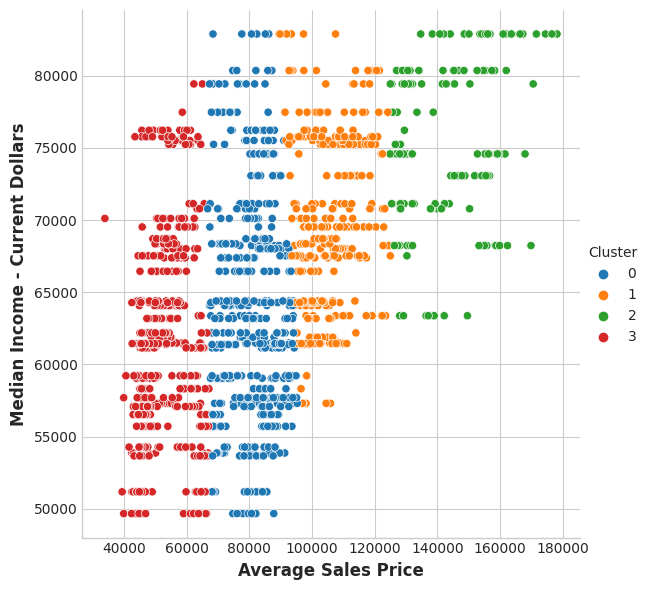

In [6]:
sns.relplot(
    x="Average Sales Price", y="Median Income - Current Dollars", hue="Cluster", data=X, height=6,
);

The scatter plot provided illustrates a clustering result where data points are grouped based on "Average Sales Price" and "Median Income - Current Dollars". The data points are color-coded to represent different clusters identified by a clustering algorithm, likely k-means given the distribution and grouping style.

Cluster Interpretation:
Cluster 0 (Blue): This cluster is characterized by a moderate range of both average sales prices and median incomes. It occupies a central position in both dimensions, indicating middle-tier housing markets where incomes and housing prices are balanced.

Cluster 1 (Orange): Occupying the lower range of average sales prices and median incomes, this cluster represents regions with relatively affordable housing markets and lower median incomes. The spread along the median income axis suggests varying economic conditions within this group.

Cluster 2 (Green): This cluster groups the higher end of average sales prices with relatively higher median incomes. It represents affluent areas with high housing costs and correspondingly high income levels. The tight clustering along both axes indicates less variability in economic conditions compared to other clusters.

Cluster 3 (Red): These points appear to be outliers or special cases with very high median incomes but varied housing prices, indicating unique markets where high income does not necessarily translate into high housing prices. These could be areas with high earning potential but moderate living costs or specific economic conditions that decouple income from housing prices.

### Analysis:

Economic Insights: The clustering provides insights into different market segments based on economic factors. It helps in identifying how house prices correlate with local median incomes and can guide economic, real estate, and regional development policies.

Market Segmentation: For businesses, particularly in real estate and financial services, understanding these segments helps tailor products and services to meet the needs of different income and pricing tiers.

Policy Making: Local governments and planners can use such data to identify needs for affordable housing, upscale development, or economic interventions to balance disparities in housing markets.